# Midterm 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is `100` points.
* You have `125` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 1` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,)
* and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_1_data.xlsx`

This file has sheets for...
* `stocks excess returns` - excess returns of the 14 biggest companies in the S&P.
* `proshares excess returns` - excess returns of ETFs and indexes from the Proshares case study.
* `fx carry excess returns` - excess returns from FX products.

Note the data is **monthly** for the first two sheets (stocks and proshares). Any annualizations for those two sheets should use `12` months in a year. Annualization for the third sheet (fx carry excess returns) is explained in section 4.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 15     |
| 2       | 25     |
| 3       | 35     |
| 4       | 25     |

### Each numbered question is worth 5 points unless otherwise specified.

***

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

#### (10pts)

In the mean-variance optimization of `homework 1`, suppose we found the mean excess return of TIPS is 4% annualized.

Explain--conceptually--how each of the following would have impacted the new (with TIPS) MV solution.
* TIPS is found to have correlation of 0% to `IEF` and 0% to SPY.
* TIPS is found to have correlation of 100% to `IEF`.

Would it be possible for TIPS to have been found to have 0% correlation to every other asset in `homework 1`? Explain.

1.  If TIPS is found to have zero correlation with both IEF (U.S. Treasury bonds) and SPY (S&P 500 equities), it would serve as an ideal diversifier in the portfolio.

In a mean-variance optimization, assets with lower correlations help reduce overall portfolio risk without sacrificing return. Since TIPS has a 4% expected annualized return, which is attractive compared to IEF and bonds, and provides diversification by being uncorrelated with both IEF and SPY, it would likely result in a higher allocation to TIPS. This is because its inclusion reduces the overall portfolio volatility while maintaining a good expected return. 

2.  If TIPS is found to have a correlation of 100% with IEF, it means that TIPS and IEF behave identically in terms of returns. This would make TIPS redundant in the context of mean-variance optimization because adding TIPS wouldn't provide any additional diversification benefit to the portfolio. The allocation to both would depend solely on their relative returns and risks. Since Tips provides 4% excess return and real yield of US Treasury bonds had been historically 2%, then the optimizer would likely allocate more to TIPS and reduce the allocation to IEF.

3. It is unlikely for TIPS to have 0% correlation with every other asset. TIPS are sensitive to inflation and interest rates, which also affect other fixed-income assets, particularly IEF (Treasury bonds). Therefore, while TIPS may have low correlation with equities (SPY) due to their differing risk factors, they would likely have some degree of correlation with other bonds like IEF.

### 2. 

Depending on the application, one may or may not choose to include an intercept term in a linear factor decomposition of an asset’s returns. In what circumstances would I prefer to include an intercept, and in what circumstances would I not?

1. Include an intercept: 
If we want to measure alpha, or the portion of the asset's returns that cannot be explained by the factors in the model, you should include an intercept. In addition, by including the intercept, we could test the model fit, to see whether the model's predicted returns match the actual average returns of the asset. If the model is well specified and there is no alpha, the intercept should be statistically insignificant (close to zero). 

2. Not include an intercept:
If the objective of your factor decomposition is purely to decompose returns into their systematic risk components without making any assumptions about alpha or manager skill, you might exclude the intercept. 
In some economic models, it is assumed that there is no intercept because the asset’s expected return is entirely driven by factor exposures (such as market risk, size, value). For example, in the Capital Asset Pricing Model (CAPM) and Fama-French multi-factor models, the intercept might be omitted if the focus is on factor risk premiums, assuming that in an efficient market, there is no persistent alpha (Sharpe, 1964; Fama & French, 1993).

***

# 2. Portfolio Allocation

For this question you will only use data from the sheet `stocks excess returns`.

It contains excess returns for the 14 largest stocks in the S&P.

Citation: Code thanks to the help of ChatGBT

### 1.

Calculate the tangency portfolio from the start of the sample to December of 2018 (to 2018-12-31), which we call in-sample period. Use the following methods:
- Traditional tangency portfolio.
- Regularized tangency portfolio (divide by 2 every element outside of the diagonal in the covariance matrix prior to the calculation).

Return:
- The weights of each asset for the traditional tangency portfolio and the regularized tangency portfolio.
- The sum of absolute values of the weights for the traditional tangency portfolio and the regularized tangency portfolio:

$$
\sum_{i=1}^{n} |w_i|
$$


In [86]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

file_path = '/Users/apple/Desktop/Uchicago/FINM 36700/midterm 1/data/midterm_1_data.xlsx'
data = pd.read_excel(file_path, sheet_name='stocks excess returns')
data.head()

,date,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,TSLA,UNH,V,XOM
0,2012-06-30,0.010943,0.072609,0.050116,-0.001270,0.082263,0.077918,0.047953,0.050766,0.048052,0.111916,0.060768,0.052919,0.073267,0.088352
1,2012-07-31,0.045822,0.021677,0.018121,0.091196,0.024570,0.015958,0.026101,-0.301929,-0.036613,-0.020260,-0.123682,-0.126667,0.044002,0.014958
2,2012-08-31,0.093695,0.063985,-0.006075,0.082161,-0.017188,0.031486,0.031399,-0.168306,0.052556,0.036008,0.039935,0.062649,-0.004849,0.011533
3,2012-09-30,0.002878,0.024450,0.045849,0.101397,0.022030,0.090012,0.055749,0.199417,-0.034312,-0.049099,0.026730,0.024657,0.047099,0.047619
4,2012-10-31,-0.107527,-0.084192,-0.020903,-0.098271,0.027789,0.037321,0.025805,-0.025320,-0.040922,-0.101877,-0.039204,0.010720,0.033436,-0.002989


In [87]:
numeric_data = data.drop(columns=['date'])
mean_returns = numeric_data.mean()
cov_matrix = numeric_data.cov()

def portfolio_risk(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return = weights.T @ mean_returns
    portfolio_volatility = portfolio_risk(weights, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: no short-selling (weights between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# Initial guess for weights (equal allocation)
initial_guess = np.array([1/len(mean_returns)] * len(mean_returns))

# Optimize the traditional tangency portfolio
result = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Extract traditional tangency portfolio weights
traditional_weights = result.x
print("Traditional Tangency Portfolio Weights:", traditional_weights)

# Regularize the covariance matrix (divide off-diagonal elements by 2)
regularized_cov_matrix = cov_matrix.copy()
for i in range(len(mean_returns)):
    for j in range(len(mean_returns)):
        if i != j:
            regularized_cov_matrix.iloc[i, j] /= 2

# Optimize the regularized tangency portfolio
result_reg = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, regularized_cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Extract regularized tangency portfolio weights
regularized_weights = result_reg.x
print("Regularized Tangency Portfolio Weights:", regularized_weights)

# Calculate sum of absolute weights
traditional_weight_sum = np.sum(np.abs(traditional_weights))
regularized_weight_sum = np.sum(np.abs(regularized_weights))

print("Sum of absolute traditional weights:", traditional_weight_sum)
print("Sum of absolute regularized weights:", regularized_weight_sum)

Traditional Tangency Portfolio Weights: [0.00000000e+00 3.36573653e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.42824494e-03 3.31764299e-01 4.24079419e-02
 5.06481017e-02 1.64137807e-01 3.12177327e-02 2.70732540e-01
 1.02663333e-01 5.99354273e-17]
Regularized Tangency Portfolio Weights: [1.01479386e-02 1.47276901e-02 2.71407953e-02 4.34029669e-02
 1.97866896e-18 5.45637211e-02 2.37998379e-01 4.76556345e-02
 1.17395088e-01 1.04983822e-01 3.45650867e-02 1.99795463e-01
 1.07623414e-01 0.00000000e+00]
Sum of absolute traditional weights: 1.0
Sum of absolute regularized weights: 1.0000000000000002


### 2.

Calculate the annualized summary statistics (mean, Sharpe, vol) of both portfolios in-sample.


In [88]:
# Define a function to calculate portfolio returns
def portfolio_returns(weights, data):
    return data @ weights

# Define a function to calculate Sharpe ratio
def sharpe_ratio(portfolio_return, portfolio_volatility, risk_free_rate=0):
    excess_return = np.mean(portfolio_return) - risk_free_rate
    return excess_return / portfolio_volatility

# Define a function to calculate annualized statistics
def annualized_statistics(portfolio_return, risk_free_rate=0, periods_per_year=12):
    mean_return = np.mean(portfolio_return) * periods_per_year
    volatility = np.std(portfolio_return) * np.sqrt(periods_per_year)
    sharpe = sharpe_ratio(portfolio_return, volatility, risk_free_rate)
    return mean_return, volatility, sharpe

# Calculate portfolio returns for traditional and regularized portfolios
traditional_portfolio_returns = portfolio_returns(traditional_weights, numeric_data)
regularized_portfolio_returns = portfolio_returns(regularized_weights, numeric_data)

# Calculate annualized statistics for the traditional portfolio
traditional_mean_return, traditional_volatility, traditional_sharpe = annualized_statistics(traditional_portfolio_returns)

# Calculate annualized statistics for the regularized portfolio
regularized_mean_return, regularized_volatility, regularized_sharpe = annualized_statistics(regularized_portfolio_returns)

# Print the results for both portfolios
print("Traditional Tangency Portfolio Statistics:")
print(f"Annualized Mean Return: {traditional_mean_return:.4f}")
print(f"Annualized Volatility: {traditional_volatility:.4f}")
print(f"Annualized Sharpe Ratio: {traditional_sharpe:.4f}")

print("\nRegularized Tangency Portfolio Statistics:")
print(f"Annualized Mean Return: {regularized_mean_return:.4f}")
print(f"Annualized Volatility: {regularized_volatility:.4f}")
print(f"Annualized Sharpe Ratio: {regularized_sharpe:.4f}")


Traditional Tangency Portfolio Statistics:
Annualized Mean Return: 0.3128
Annualized Volatility: 0.1565
Annualized Sharpe Ratio: 0.1666

Regularized Tangency Portfolio Statistics:
Annualized Mean Return: 0.2860
Annualized Volatility: 0.1480
Annualized Sharpe Ratio: 0.1610


### 3.

Use the weights calculated in question (2.2) to produce portfolio returns out-of-sample for both the Traditional and Regularized portfolio (from January 2019 onwards). 

Report the **last 3 returns** of both portfolios in the out-of-sample (the traditional tangency portfolio and the regularized tangency portfolio).

In [89]:
# Load the out-of-sample data (from January 2019 onwards)
out_of_sample_data = pd.read_excel(file_path, sheet_name='stocks excess returns', index_col='date')

# Filter the out-of-sample period (from January 2019 onwards)
out_of_sample_data = out_of_sample_data.loc['2019-01-01':]

# Calculate out-of-sample portfolio returns for traditional and regularized portfolios
traditional_out_of_sample_returns = portfolio_returns(traditional_weights, out_of_sample_data)
regularized_out_of_sample_returns = portfolio_returns(regularized_weights, out_of_sample_data)

# Extract the last 3 returns for both portfolios
last_3_traditional_returns = traditional_out_of_sample_returns[-3:]
last_3_regularized_returns = regularized_out_of_sample_returns[-3:]

# Display the last 3 returns
print("Last 3 Out-of-Sample Returns for Traditional Tangency Portfolio:")
print(last_3_traditional_returns)

print("\nLast 3 Out-of-Sample Returns for Regularized Tangency Portfolio:")
print(last_3_regularized_returns)


Last 3 Out-of-Sample Returns for Traditional Tangency Portfolio:
date
2024-07-31   -0.013441
2024-08-31    0.076106
2024-09-30   -0.022067
dtype: float64

Last 3 Out-of-Sample Returns for Regularized Tangency Portfolio:
date
2024-07-31   -0.010655
2024-08-31    0.057893
2024-09-30   -0.014555
dtype: float64


### 4.

Report the annualized summary statistics (Mean, Vol and Sharpe) of both portfolios in the out-of-sample.

Note: you are using the weights optimized for the in-sample and generating statistics with the out-of-sample returns.

In [90]:
def annualized_statistics(portfolio_returns, risk_free_rate=0):
    mean_return = np.mean(portfolio_returns) * 12  # Multiply by 12 to annualize monthly returns
    vol = np.std(portfolio_returns) * np.sqrt(12)  # Multiply by sqrt(12) to annualize monthly volatility
    sharpe_ratio = (mean_return - risk_free_rate) / vol  
    return mean_return, vol, sharpe_ratio

# Calculate annualized summary statistics for the traditional tangency portfolio
trad_mean_return, trad_vol, trad_sharpe = annualized_statistics(traditional_out_of_sample_returns)

# Calculate annualized summary statistics for the regularized tangency portfolio
reg_mean_return, reg_vol, reg_sharpe = annualized_statistics(regularized_out_of_sample_returns)

print("Out-of-Sample Traditional Tangency Portfolio Statistics:")
print(f"Annualized Mean Return: {trad_mean_return:.4f}")
print(f"Annualized Volatility: {trad_vol:.4f}")
print(f"Annualized Sharpe Ratio: {trad_sharpe:.4f}")

print("\nOut-of-Sample Regularized Tangency Portfolio Statistics:")
print(f"Annualized Mean Return: {reg_mean_return:.4f}")
print(f"Annualized Volatility: {reg_vol:.4f}")
print(f"Annualized Sharpe Ratio: {reg_sharpe:.4f}")


Out-of-Sample Traditional Tangency Portfolio Statistics:
Annualized Mean Return: 0.3582
Annualized Volatility: 0.1888
Annualized Sharpe Ratio: 1.8970

Out-of-Sample Regularized Tangency Portfolio Statistics:
Annualized Mean Return: 0.3159
Annualized Volatility: 0.1790
Annualized Sharpe Ratio: 1.7648


### 5.
Which portfolio has better adjusted by risk returns in the out-of-sample? Could there be a mathematical/optimization reason why one portfolio had better adjusted by risk performance? 

Relate your answer to your findings in question (2.2) (Sum of absolute weights in the traditional and regularized tangency portfolio.)

The Traditional Tangency Portfolio had better risk-adjusted performance in the out-of-sample period (higher Sharpe Ratio), but this came with slightly higher risk (volatility). The Regularized Tangency Portfolio, while providing lower returns and a lower Sharpe Ratio, offered a more diversified and stable approach, as indicated by its lower volatility. The fact that both portfolios have a sum of absolute weights equal to 1 indicates they were fully invested with no leverage or short positions. However, the Regularized Tangency Portfolio distributes its weights more evenly across assets, which is a consequence of regularizing the covariance matrix.

The traditional portfolio is optimized using the unregularized covariance matrix. This leads to a portfolio that may concentrate more on a few assets with higher expected returns relative to their volatility. This concentration can result in higher returns but also higher risk, as shown in the annualized volatility of 0.1888. In contrast, the regularized portfolio uses a covariance matrix where the off-diagonal elements are halved. This reduces the influence of extreme correlations between assets and leads to a more diversified portfolio. As a result, the risk (volatility) is slightly lower (0.1790) than that of the traditional portfolio, but the returns are also slightly lower. Regularization often smooths out overfitting to in-sample data, which can explain why the regularized portfolio’s Sharpe Ratio is lower. The regularized approach penalizes the portfolio from taking too aggressive positions based on correlations that may not hold out-of-sample.

***

# 3. Hedging and Replication

For this question you will only use data from the sheet `proshares returns`.

The following assets excess returns are available in this sheet:

- **HDG US Equity**: ProShares Hedge Replication ET
- **QAI US Equity**: NYLI Hedge Multi-Strategy Trac
- **SPY US Equity**: SPDR S&P 500 ETF Trust
- **EEM US Equity**: iShares MSCI Emerging Markets
- **EFA US Equity**: iShares MSCI EAFE ETF
- **EUO US Equity**: ProShares UltraShort Euro
- **IWM US Equity**: iShares Russell 2000 ETF
- **SPXU US Equity**: ProShares UltraPro Short S&P 5
- **UPRO US Equity**: ProShares UltraPro S&P 500

Citation: Code thanks to the help of ChatGBT

### 1. 

You work at a hedge fund.

Suppose the hedge fund is long $1 million of HDG and wants to hedge the position.

A junior analyst suggests that we can hedge our position by looking at some select ETFs, and then taking a position in the ETFs that will offset the risk of our HDG position.

They pick QAI, SPY, EEM, UPRO, SPXU, IWM, and EFA.

What dollar position would we be taking in each ETF to hedge your HDG position?

In [91]:
import statsmodels.api as sm

data = pd.read_excel(file_path, sheet_name='proshares excess returns')
data.head()

,date,HDG US Equity,QAI US Equity,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,SPXU US Equity,UPRO US Equity
0,2011-08-31,-0.027036,-0.006489,-0.054976,-0.092549,-0.087549,-0.005889,-0.088913,0.056476,-0.210854
1,2011-09-30,-0.032466,-0.022141,-0.069420,-0.179063,-0.108082,0.142180,-0.111505,0.190006,-0.207003
2,2011-10-31,0.050531,0.025239,0.109147,0.162986,0.096274,-0.069502,0.151011,-0.298828,0.326066
3,2011-11-30,-0.028608,-0.007964,-0.004064,-0.019724,-0.021765,0.054627,-0.003784,-0.035515,-0.033502
4,2011-12-31,0.012875,0.001822,0.010449,-0.042649,-0.021744,0.075581,0.005144,-0.051986,0.022939


In [92]:
etfs = ['QAI US Equity', 'SPY US Equity', 'EEM US Equity', 'UPRO US Equity', 'SPXU US Equity', 'IWM US Equity', 'EFA US Equity']
hdg_returns = data['HDG US Equity']
etf_returns = data[etfs]

X = sm.add_constant(etf_returns)
y = hdg_returns

# Perform linear regression to find the hedge ratios
model = sm.OLS(y, X).fit()
hedge_ratios = model.params[1:]  

print("Hedge Ratios for each ETF:", hedge_ratios)

# Calculate the dollar position in each ETF (hedge ratios * $1 million)
hdg_position = 1_000_000
hedge_positions = hedge_ratios * hdg_position

# Display the dollar positions to take in each ETF
hedge_positions.index = etfs 
print("Dollar Positions in each ETF for hedging HDG:", hedge_positions)

Hedge Ratios for each ETF: QAI US Equity     0.151537
SPY US Equity     0.515376
EEM US Equity     0.044816
UPRO US Equity   -0.140222
SPXU US Equity    0.032654
IWM US Equity     0.139036
EFA US Equity     0.117000
dtype: float64
Dollar Positions in each ETF for hedging HDG: QAI US Equity     151537.448542
SPY US Equity     515376.353192
EEM US Equity      44816.294871
UPRO US Equity   -140222.469367
SPXU US Equity     32654.030196
IWM US Equity     139036.207774
EFA US Equity     117000.288623
dtype: float64


### 2.

#### (7pts)
What is the gross notional of the hedge?

What is the R-squared of the hedge?

What do these two statistics indicate about the practical use of this hedge?

In [93]:
# Calculate the gross notional of the hedge
gross_notional = np.sum(np.abs(hedge_positions))
print("Gross Notional of the Hedge:", gross_notional)

# Calculate the R-squared of the hedge (from the linear regression model)
r_squared = model.rsquared
print("R-squared of the Hedge:", r_squared)


Gross Notional of the Hedge: 1140643.092565154
R-squared of the Hedge: 0.9128835765562017


1. Gross Notional of the Hedge: 1,140,643.09
This value tells you the total amount of exposure you have in the ETFs used to hedge the $1 million HDG position. Since the gross notional exceeds the initial HDG position ($1,140,643.09 vs. $1 million), it indicates that over-hedging was required.

2. R-squared of the Hedge: 0.9129
The R-squared value of 0.9129 indicates that the hedge explains about 91.3% of the variation in HDG’s returns. In other words, the hedge is quite effective at replicating HDG's return movements. 

### 3.

Suppose instead we don't want to hedge our position. We believe that the value of HDG can be *entirely* determined by some combination of the other ETFs. 

So, you propose the following model:

$$
HDG_t = \beta_1 QAI_t + \beta_2 SPY_t + \beta_3 EEM_t + \varepsilon_t
$$

We think any difference between the value of HDG and the value of the ETFs is a mispricing, and will revert to 0 in the future. We call such a strategy "trading the residuals".

Therefore, if $\varepsilon_t > 0$, we should be short HDG and long the basket, and if $\varepsilon_t < 0$, we should be long HDG and short the basket.

Now...
* Run the model specified above and report the $\beta$'s values.
* After, create the "basket" portfolio, using the $\beta$'s as weights (they do not need to add up to one). Report the final three values.

In [94]:
X = data[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']]  
Y = data['HDG US Equity']  

X = sm.add_constant(X)

# Run the linear regression model
model = sm.OLS(Y, X).fit()

# Get the β values
beta_values = model.params
print("Beta values for QAI, SPY, EEM:", beta_values)

# Residuals from the model
residuals = model.resid

# Create the basket portfolio using the β values as weights
basket_portfolio = (beta_values['QAI US Equity'] * data['QAI US Equity'] +
                    beta_values['SPY US Equity'] * data['SPY US Equity'] +
                    beta_values['EEM US Equity'] * data['EEM US Equity'])

# Report the final three values of the basket portfolio
final_three_values = basket_portfolio.tail(3)
print("Final three values of the basket portfolio:", final_three_values)

# Report the residuals for the final three values (ε_t)
final_three_residuals = residuals.tail(3)
print("Final three residual values (ε_t):", final_three_residuals)

Beta values for QAI, SPY, EEM: const           -0.001006
QAI US Equity    0.341458
SPY US Equity    0.176273
EEM US Equity    0.083082
dtype: float64
Final three values of the basket portfolio: 155    0.006688
156    0.007543
157    0.013440
dtype: float64
Final three residual values (ε_t): 155    0.018699
156   -0.008949
157   -0.004986
dtype: float64


### 4.

#### (8pts)

Construct the strategy indicated by the approach in the previous problem.

For a given period $t$:
- if the $\varepsilon_t \leq 0$ (is negative or equal to 0), you should be long HDG 200% in HDG and short 100% in the basket portfolio **in period $t+1$**.
- if the $\varepsilon_t > 0$ (is positive), you should be long 200% in the basket portfolio and short 100% **in HDG in period $t+1$**.

Do not worry about the look forward bias: in this scenario, you should run the model only once with the entire dataset and define your $\varepsilon_t$ for any $t$ also considering the model that has acess to data in $t+1, t+2, ...$ to make the calculation.  

Report the annualized summary statistics of this strategy (Mean, Vol and Sharpe).

In [95]:
portfolio_returns = []

for t in range(len(residuals) - 1):
    if residuals.iloc[t] <= 0:
        # Long 200% HDG and short 100% basket portfolio
        strategy_return = 2 * data['HDG US Equity'].iloc[t+1] - basket_portfolio.iloc[t+1]
    else:
        # Long 200% basket portfolio and short 100% HDG
        strategy_return = 2 * basket_portfolio.iloc[t+1] - data['HDG US Equity'].iloc[t+1]
    
    portfolio_returns.append(strategy_return)

# Convert the strategy returns to a pandas series
portfolio_returns = pd.Series(portfolio_returns)

# Calculate annualized summary statistics (Mean, Vol, Sharpe)
mean_return = portfolio_returns.mean() * 12 
volatility = portfolio_returns.std() * np.sqrt(12) 
sharpe_ratio = mean_return / volatility  

print(f"Annualized Mean Return: {mean_return:.4f}")
print(f"Annualized Volatility: {volatility:.4f}")
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")

Annualized Mean Return: 0.0364
Annualized Volatility: 0.0629
Annualized Sharpe Ratio: 0.5793


### 5.

On a different matter, we are now studying QAI and want to track (replicate) it using the other available ETFs.

Use an intercept and report:

- $\beta$ (and the sum of $\beta$'s absolute value).
- $\alpha$ and Information Ratio.
- $R^2$.
- Correlation matrix between the assets used to replicate QAI.

In [96]:
numeric_data = data.drop(columns=['date'])

y = numeric_data['QAI US Equity']  
X = numeric_data.drop(columns=['QAI US Equity'])  

X = sm.add_constant(X)

# Fit the linear model
model = sm.OLS(y, X).fit()

# Report the beta values and their absolute sum
betas = model.params[1:]  # Exclude the intercept
sum_absolute_betas = betas.abs().sum()

# Report the alpha (intercept) and the Information Ratio
alpha = model.params[0] 
residuals = model.resid
information_ratio = alpha / residuals.std()


r_squared = model.rsquared
correlation_matrix = X.iloc[:, 1:].corr()  

# Print the results
print("Betas:", betas)
print("Sum of Absolute Betas:", sum_absolute_betas)
print("Alpha (Intercept):", alpha)
print("Information Ratio:", information_ratio)
print("R-squared:", r_squared)
print("Correlation Matrix:\n", correlation_matrix)

Betas: HDG US Equity     0.231451
SPY US Equity     0.565072
EEM US Equity     0.047792
EFA US Equity     0.032642
EUO US Equity    -0.020484
IWM US Equity    -0.000157
SPXU US Equity    0.051074
UPRO US Equity   -0.095099
dtype: float64
Sum of Absolute Betas: 1.0437712111088089
Alpha (Intercept): -0.0005246832772640281
Information Ratio: -0.09143105712970878
R-squared: 0.8419884087094259
Correlation Matrix:
                 HDG US Equity  SPY US Equity  EEM US Equity  EFA US Equity  \
HDG US Equity        1.000000       0.873618       0.801281       0.894867   
SPY US Equity        0.873618       1.000000       0.708186       0.865371   
EEM US Equity        0.801281       0.708186       1.000000       0.833854   
EFA US Equity        0.894867       0.865371       0.833854       1.000000   
EUO US Equity       -0.419163      -0.381608      -0.601403      -0.575282   
IWM US Equity        0.894708       0.867994       0.661675       0.784217   
SPXU US Equity      -0.814764      -0.955

### 6.

Explain how good is your replication, pointing out at least one good or bad argument related to each of the statistics mentioned in the bullet points above (thus, you should have at least 4 arguments).

The replication is fairly strong given the high R-squared and meaningful beta exposures, particularly with SPY. However, the negative alpha and the slightly elevated sum of betas suggest the model is not perfectly balanced, with a small risk of underperformance and potential over-leverage.

Betas: The beta for SPY (0.565) indicates strong replication influence from the S&P 500. However, the sum of absolute betas slightly exceeds 1, suggesting minor over-leverage, which is not ideal.

Alpha: The alpha (-0.00052) is near zero, meaning minimal tracking error, which is desirable. However, the negative value indicates consistent underperformance relative to HDG.

Information Ratio: The negative Information Ratio (-0.091) implies that the replication does not add value beyond factor exposures and points to inefficiency in capturing any excess return.

R-squared: An R-squared of 0.842 shows that 84.2% of HDG’s movements are captured by the model, indicating a good but not perfect fit. The remaining 15.8% suggests unique features of HDG are not fully replicated.

***

# 4. 

The data in sheet `fx carry excess returns` has **excess** daily returns for trading currencies.
* You **do NOT need** to know anything about FX, currency, or the underlying strategies.
* Rather, just take these return series as given.

For the problems below, we will **only use** the `JPY` series.

Citation: Code thanks to the help of ChatGBT

### 1.

Calculate the `1%` VaR as follows...

Empirical VaR:
* At every point in time, calculate the `1st` quantile of the returns up to that point.
* No need to scale the answers.
  
Report the VaR for the final date of the sample.

In [97]:
data = pd.read_excel(file_path, sheet_name='fx carry returns')
data.head()

,date,JPY,EUR,GBP,MXN,CHF
0,2019-01-07,-0.001843,0.006810,0.004171,0.003359,0.007559
1,2019-01-08,-0.000324,-0.002998,-0.004770,0.000251,-0.001806
2,2019-01-09,0.005222,0.008793,0.005588,0.007223,0.006826
3,2019-01-10,-0.002486,-0.003847,-0.003358,0.005444,-0.010275
4,2019-01-11,-0.000865,-0.002819,0.007536,-0.000323,0.000746


In [98]:
import numpy as np

jpy_returns = data['JPY']

# Calculate the 1% empirical VaR at each point in time up to the current day
VaR_1_percent = jpy_returns.expanding().quantile(0.01)

# Report the VaR for the final date of the sample
final_var = VaR_1_percent.iloc[-1]

print("Final VaR (1% Quantile) for the last date in the sample:", final_var)

Final VaR (1% Quantile) for the last date in the sample: -0.01717837630807654


### 2.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* rolling volatility.
* using a window of `233` days.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

In [99]:
import numpy as np

# Assuming 'JPY' column contains the excess returns for JPY
jpy_returns = data['JPY']

# Calculate rolling volatility with a window of 233 days (without using sample mean)
rolling_volatility = jpy_returns.rolling(window=233).std()

# Calculate the normal VaR as -2.33 times the rolling volatility
normal_var = -2.33 * rolling_volatility

# Report the VaR for the final 3 days of the sample
final_var = normal_var.iloc[-3:]
print("Normal VaR (1%) for the final 3 days:")
print(final_var)

Normal VaR (1%) for the final 3 days:
1302   -0.013358
1303   -0.013646
1304   -0.013844
Name: JPY, dtype: float64


### 3.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* EWMA volatility
* using $\lambda = 0.94$.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

In [100]:
import numpy as np

lambda_ewma = 0.94
z_score_99 = -2.33  # For 1% VaR
initial_vol = 0.20 / np.sqrt(252)  
returns = data['JPY']  

ewma_vol = np.zeros_like(returns)

ewma_vol[0] = initial_vol

# Compute EWMA volatility using recursion
for t in range(1, len(returns)):
    ewma_vol[t] = np.sqrt((1 - lambda_ewma) * (returns[t - 1] ** 2) + lambda_ewma * (ewma_vol[t - 1] ** 2))

normal_var_ewma = z_score_99 * ewma_vol

# Report the VaR for the final 3 days
final_var = normal_var_ewma[-3:]
print("Normal VaR (EWMA, 1%) for the final 3 days:")
print(final_var)

Normal VaR (EWMA, 1%) for the final 3 days:
[-0.01782425 -0.01742988 -0.02014006]


### 4.

Make a plot of the three timeseries of your VaR estimates.

Succinctly point out the pros / cons of these approaches.

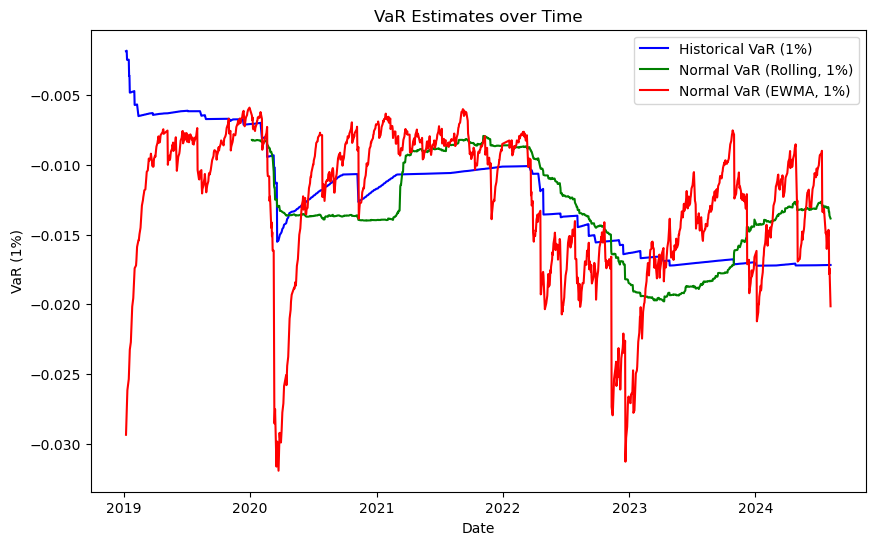

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Plot the three VaR estimates
plt.plot(data['date'], VaR_1_percent, label='Historical VaR (1%)', color='blue')
plt.plot(data['date'], normal_var, label='Normal VaR (Rolling, 1%)', color='green')
plt.plot(data['date'], normal_var_ewma, label='Normal VaR (EWMA, 1%)', color='red')

# Adding labels and legend
plt.title('VaR Estimates over Time')
plt.xlabel('Date')
plt.ylabel('VaR (1%)')
plt.legend()

# Display the plot
plt.show()

### 5.

What statistic do we use to judge the performance of a VaR model?

Estimate and report this statistic across the VaR methods.

Which VaR model do you find is best?

The primary statistic used to judge the performance of a VaR model is the hit ratio. This statistic checks how often the actual losses exceed the predicted VaR. For a 1% VaR model, we would expect the actual losses to exceed the VaR threshold approximately 1% of the time.

In [102]:
historical_hit = (returns < VaR_1_percent).sum()
rolling_hit = (returns < normal_var).sum()
ewma_hit = (returns < normal_var_ewma).sum()

total_days = len(returns)

historical_hit_rate = historical_hit / total_days
rolling_hit_rate = rolling_hit / total_days
ewma_hit_rate = ewma_hit / total_days

print(f"Historical Hit Ratio: {historical_hit_rate * 100:.2f}%")
print(f"Rolling Hit Ratio: {rolling_hit_rate * 100:.2f}%")
print(f"EWMA Hit Ratio: {ewma_hit_rate * 100:.2f}%")


Historical Hit Ratio: 2.30%
Rolling Hit Ratio: 1.99%
EWMA Hit Ratio: 1.99%


The Historical VaR has a hit ratio of 2.30%, which is significantly higher than the expected 1%. This indicates that the model is underestimating risk — the actual losses are exceeding the predicted VaR too often, making it less reliable in capturing tail risk.

Both the Rolling VaR and EWMA VaR have hit ratios of 1.99%, which are quite close to the expected 1%. This suggests that these models are better calibrated and offer a more balanced assessment of risk without underestimating or overestimating it significantly.

If we prefer a model that responds quickly to market changes and is highly sensitive, the EWMA VaR might be best.
If we prefer a more conservative model with fewer spikes, the Rolling VaR would be a better choice.

I would prefer Rolling VaR, as it is not that super sensitive and still capture and general trend. 

***